In [1]:
import sklearn;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df=pd.read_csv("addiction.csv")
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,No,Yes,No,Yes,No,No,Yes,No,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,No,Yes,No,No,No,No,Yes,No


In [ ]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
df['Experimentation']=le.fit_transform(df['Experimentation'].astype(str))
df['Academic_Performance_Decline']=le.fit_transform(df['Academic_Performance_Decline'].astype(str))
df['Social_Isolation']=le.fit_transform(df['Social_Isolation'].astype(str))
df['Financial_Issues']=le.fit_transform(df['Financial_Issues'].astype(str))
df['Physical_Mental_Health_Problems']=le.fit_transform(df['Physical_Mental_Health_Problems'].astype(str))
df['Legal_Consequences']=le.fit_transform(df['Legal_Consequences'].astype(str))
df['Relationship_Strain']=le.fit_transform(df['Relationship_Strain'].astype(str))
df['Risk_Taking_Behavior']=le.fit_transform(df['Risk_Taking_Behavior'].astype(str))
df['Withdrawal_Symptoms']=le.fit_transform(df['Withdrawal_Symptoms'].astype(str))
df['Denial_and_Resistance_to_Treatment']=le.fit_transform(df['Denial_and_Resistance_to_Treatment'].astype(str))
df['Addiction_Class']=le.fit_transform(df['Addiction_Class'].astype(str))
df.head()
df.tail()


,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
12739,0,0,0,1,0,0,2,0,0,0,0
12740,0,1,1,0,2,0,0,2,1,0,1
12741,0,0,1,0,0,1,1,0,0,0,1
12742,0,0,0,0,0,1,0,1,0,0,0
12743,0,1,0,0,0,0,0,2,0,0,0


In [ ]:
X = df.drop(columns=['Addiction_Class'])
y = df['Addiction_Class']

In [ ]:
print(X)

       Experimentation  Academic_Performance_Decline  Social_Isolation  \
0                    1                             1                 1   
1                    0                             0                 1   
2                    0                             0                 0   
3                    1                             0                 1   
4                    0                             0                 0   
...                ...                           ...               ...   
12739                0                             0                 0   
12740                0                             1                 1   
12741                0                             0                 1   
12742                0                             0                 0   
12743                0                             1                 0   

       Financial_Issues  Physical_Mental_Health_Problems  Legal_Consequences  \
0                     0        

In [ ]:
print(y)

0        0
1        0
2        0
3        1
4        0
        ..
12739    0
12740    1
12741    1
12742    0
12743    0
Name: Addiction_Class, Length: 12744, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

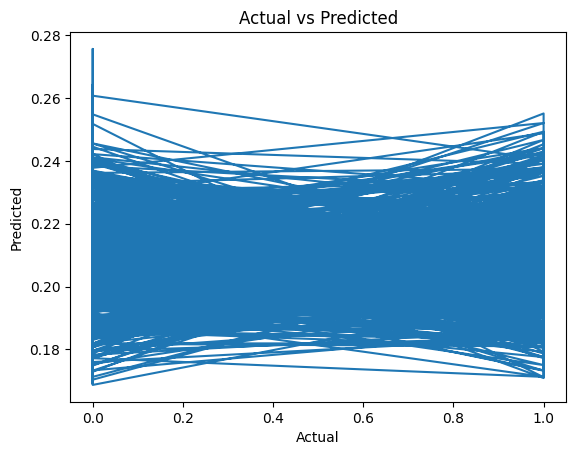

In [ ]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
plt.plot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
print(y_pred.min())
print(y_pred.max())


0.16872498627938134
0.2756416800087307


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.16
R-squared: -0.00


In [ ]:
# Function to preprocess new input and make predictions
def predict_addiction(input_data):
    # Convert input data to DataFrame
    df = pd.DataFrame([input_data])
    import sklearn.preprocessing as preprocessing
    le=preprocessing.LabelEncoder()
    # Encode the input data
    df['Experimentation']=le.fit_transform(df['Experimentation'].astype(str))
    df['Academic_Performance_Decline']=le.fit_transform(df['Academic_Performance_Decline'].astype(str))
    df['Social_Isolation']=le.fit_transform(df['Social_Isolation'].astype(str))
    df['Financial_Issues']=le.fit_transform(df['Financial_Issues'].astype(str))
    df['Physical_Mental_Health_Problems']=le.fit_transform(df['Physical_Mental_Health_Problems'].astype(str))
    df['Legal_Consequences']=le.fit_transform(df['Legal_Consequences'].astype(str))
    df['Relationship_Strain']=le.fit_transform(df['Relationship_Strain'].astype(str))
    df['Risk_Taking_Behavior']=le.fit_transform(df['Risk_Taking_Behavior'].astype(str))
    df['Withdrawal_Symptoms']=le.fit_transform(df['Withdrawal_Symptoms'].astype(str))
    df['Denial_and_Resistance_to_Treatment']=le.fit_transform(df['Denial_and_Resistance_to_Treatment'].astype(str))

    # Make prediction
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    prediction = lm.predict(df)

    return prediction

# Example new input (replace with actual input data)
new_input = {
    'Experimentation': 'Yes',
    'Academic_Performance_Decline': 'Yes',
    'Social_Isolation': 'No',
    'Financial_Issues': 'No',
    'Physical_Mental_Health_Problems': 'Yes',
    'Legal_Consequences': 'No',
    'Relationship_Strain': 'No',
    'Risk_Taking_Behavior': 'No',
    'Withdrawal_Symptoms': 'Yes',
    'Denial_and_Resistance_to_Treatment': 'No'
}

# Predict addiction class for the new input
prediction = predict_addiction(new_input)
print(f'Predicted value: {prediction[0]:.2f}')

Predicted value: 0.19
